In [1]:
dataset_path = '../datasets/ourdata/'
result_dataset_path = './intermediate_datafiles/ourdata/'

# Import the relevant classes.

from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os


if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

Creating result directory: ./intermediate_datafiles/ourdata/


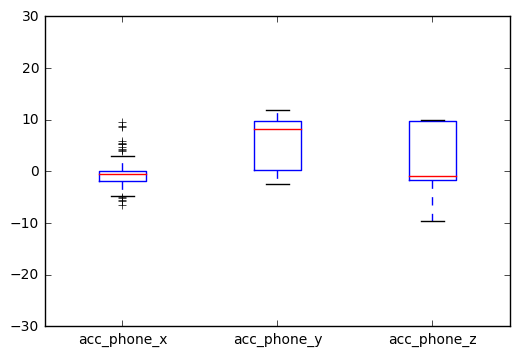

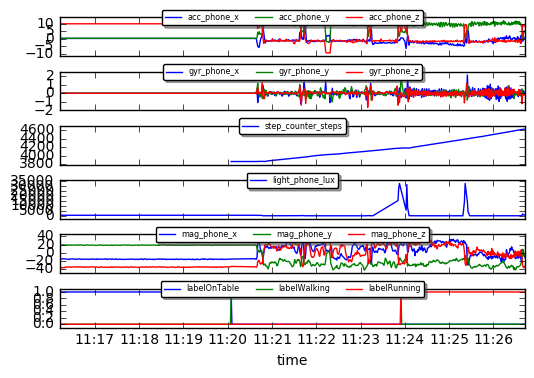

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0522979397781 -0.866165870597 1.74069537065 -6.5603040941 9.57062024975
acc_phone_y 0.0522979397781 5.43386379979 4.6237020735 -2.43806195303 11.858998683
acc_phone_z 0.0522979397781 3.39731066485 5.77218238316 -9.52298438207 9.86076885732
gyr_phone_x 0.0522979397781 0.015816046757 0.304963718503 -1.26864127107 2.12696187115
gyr_phone_y 0.0522979397781 0.0110543251902 0.230087961438 -1.01109568174 1.86825839091
gyr_phone_z 0.0522979397781 0.00336417196459 0.251650182461 -1.63021600648 1.28605601893
step_counter_steps 0.534072900158 4208.43452381 214.749390032 3860.0 4622.0
labelOnTable 0.0 0.369255150555 0.482985999864 0 1
labelWalking 0.0 0.366085578447 0.482115430061 0 1
labelRunning 0.0 0.267828843106 0.443179216884 0 1
light_phone_lux 0.565768621236 1166.34902676 4239.12542262 0.0 32767.0
mag_phone_x 0.0522979397781 -1.67084800466 16.0117191663 -30.0680847 34.63055418
mag_phone_y 0.0522979397781 -8.35

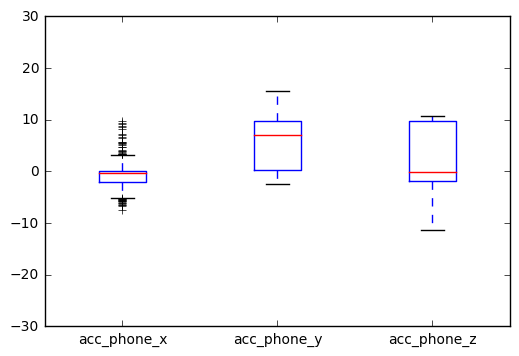

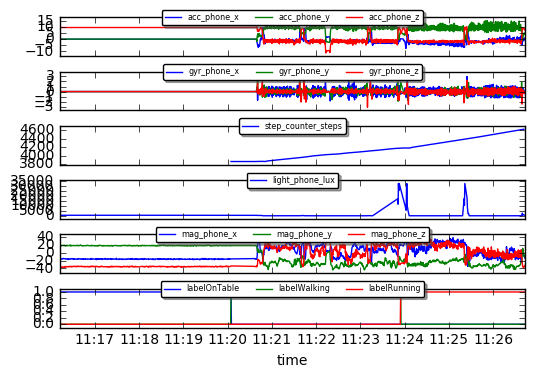

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0554675118859 -0.870303123595 1.85694829724 -7.57091992971 9.81257383384
acc_phone_y 0.0554675118859 5.44275834392 4.79728566288 -2.51336716515 15.4793913709
acc_phone_z 0.0554675118859 3.3800191337 5.81460599174 -11.3392016263 10.7213479227
gyr_phone_x 0.0554675118859 0.0153492316664 0.576008350331 -1.97724930116 3.27663538034
gyr_phone_y 0.0554675118859 0.00898144950854 0.381529511375 -1.8974414378 2.30936308164
gyr_phone_z 0.0554675118859 0.00296523157223 0.392858586503 -3.09714432127 2.43412379006
step_counter_steps 0.747226624406 4205.26645768 217.790064306 3860.0 4622.0
labelOnTable 0.0 0.368462757528 0.482578996956 0 1
labelWalking 0.0 0.36529318542 0.481703165187 0 1
labelRunning 0.0 0.267828843106 0.443003456728 0 1
light_phone_lux 0.667987321712 1180.40294352 4220.91968198 0.0 32767.0
mag_phone_x 0.0554675118859 -1.67915664875 16.1892582634 -34.83697508 38.79858392
mag_phone_y 0.0554675118859 -8

In [7]:
# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [1000, 500]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
   
    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Gyroscope.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')
   
    # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('Step Counter.csv', 'timestamps', ['steps'], 'avg', 'step_counter_')

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('ALS.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('Magnetometer.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
   
   
    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'step_counter_', 'light_phone_lux', 'mag_',  'label'], ['like', 'like',  'like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')


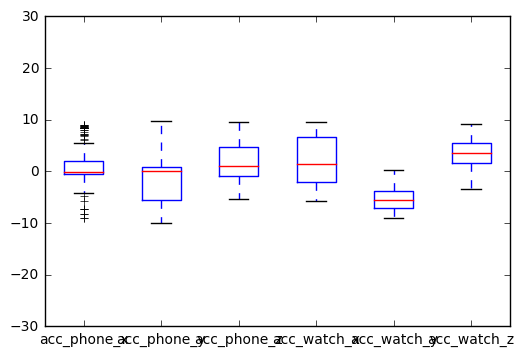

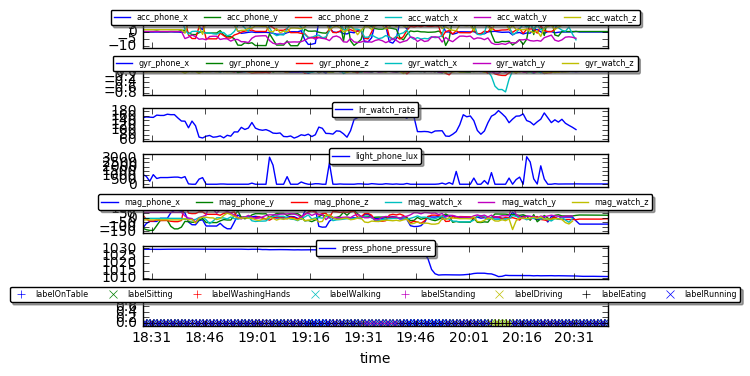

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 1.09316678299 4.19413307991 -9.11536607143 8.99831490206
acc_phone_y 0.0 -0.94155741933 5.59524537112 -10.0788806612 9.78451686787
acc_phone_z 0.0 2.02062789522 4.72460339125 -5.29072362765 9.62604606732
acc_watch_x 0.0751879699248 2.04477541499 4.8841926461 -5.81753703704 9.55180342685
acc_watch_y 0.0751879699248 -5.15344909877 2.42619106311 -9.12505964195 0.198822687017
acc_watch_z 0.0751879699248 3.63537451557 2.72074930369 -3.35526905436 9.22158023144
gyr_phone_x 0.0 -0.000517324089461 0.025919567167 -0.0796527777778 0.0864904132231
gyr_phone_y 0.0 0.0237678727189 0.0349625464964 -0.0618558915882 0.155243075651
gyr_phone_z 0.0 -0.00331767994556 0.0444515846988 -0.160126859504 0.111288677686
gyr_watch_x 0.0827067669173 -0.0287277975171 0.126786837255 -0.77268320685 0.0589147617203
gyr_watch_y 0.0827067669173 0.00306917191365 0.0291926629444 -0.0845599031116 0.123240318354
gyr_watch_z 0.0827067669173 

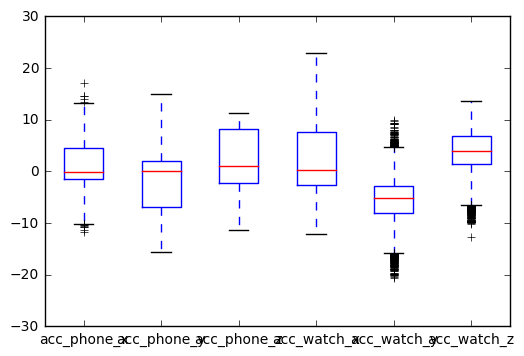

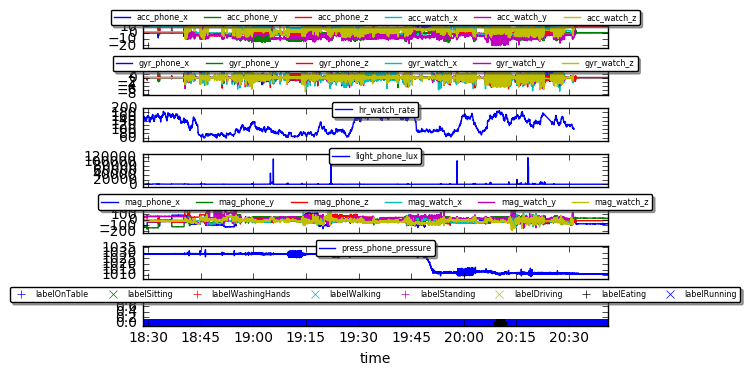

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 1.0965041731 4.66851957853 -11.75786 17.09892
acc_phone_y 0.0 -0.944272629688 6.35416458925 -15.5983653846 14.8716
acc_phone_z 0.0 2.00123903044 5.38682054822 -11.2965102041 11.37844
acc_watch_x 0.0877881776493 2.08109294272 5.78147347779 -12.1807727273 22.9420697674
acc_watch_y 0.0877881776493 -5.17808510699 3.51557737535 -20.5570454545 9.97282608696
acc_watch_z 0.0877881776493 3.59912143692 4.01049496544 -12.6246511628 13.65485
gyr_phone_x 0.0 -0.000497639298607 0.5661862353 -3.9837254902 5.68990196078
gyr_phone_y 0.0 0.0237722041321 0.427217773651 -4.94522 6.49774
gyr_phone_z 0.0 -0.00333912000501 0.516129076588 -5.39482352941 5.91628
gyr_watch_x 0.0890445379735 -0.0283735175601 0.68893345967 -6.66438636364 6.3185106383
gyr_watch_y 0.0890445379735 0.00344530142319 0.545368921686 -5.45712765957 4.94890243902
gyr_watch_z 0.0890445379735 -0.00325898319956 0.802107524236 -7.019 5.5125
hr_watch_rate 0.764

In [8]:

dataset_path = '../datasets/crowdsignals.io/csv-participant-one/'
result_dataset_path = './intermediate_datafiles/'


if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [60000, 250]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('gyroscope_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')
    DataSet.add_numerical_dataset('gyroscope_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_watch_')

    # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('heart_rate_smartwatch.csv', 'timestamps', ['rate'], 'avg', 'hr_watch_')

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('light_phone.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('magnetometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
    DataSet.add_numerical_dataset('magnetometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_watch_')

    # We add the pressure sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('pressure_phone.csv', 'timestamps', ['pressure'], 'avg', 'press_phone_')

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'hr_watch_rate', 'light_phone_lux', 'mag_', 'press_phone_', 'label'], ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')
